In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

# Importing all data manipulation libraries
import pandas as pd
import numpy as np

# Libraries for data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

# Libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.feature_selection import mutual_info_regression,SelectPercentile
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error, r2_score

# Loading the Dataset and Taking a Quick Look

In [2]:
# Loading the dataset as pandas dataframe
df = pd.read_csv('datcw_na.csv')
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,C3,1.19,622.55,NaN,89.31,7.00,1.98,0.0,0.0,15.55
1,C1,1.19,622.55,323.40,109.15,7.70,3.00,0.0,0.0,15.55
2,C1,0.88,463.05,291.06,99.23,5.67,4.40,0.0,0.0,15.55
3,C2,0.79,509.36,291.06,121.28,6.30,4.05,0.0,0.0,15.55
4,C1,0.89,507.15,385.39,121.28,7.70,2.00,0.0,0.0,20.84


In [3]:
# Finding the number of rows and columns
df.shape

(768, 10)

In [4]:
# Renaming the column names with the appropriate below columns
df.columns = ['Building_Category','Relative_Compactness','Surface_Area','Wall_Area','Roof_Area','Overall_Height',
              'Orientation','Glazing_Area','Glazing_Area_Distribution','Heating_Load']
df.head()

,Building_Category,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load
0,C3,1.19,622.55,NaN,89.31,7.00,1.98,0.0,0.0,15.55
1,C1,1.19,622.55,323.40,109.15,7.70,3.00,0.0,0.0,15.55
2,C1,0.88,463.05,291.06,99.23,5.67,4.40,0.0,0.0,15.55
3,C2,0.79,509.36,291.06,121.28,6.30,4.05,0.0,0.0,15.55
4,C1,0.89,507.15,385.39,121.28,7.70,2.00,0.0,0.0,20.84


# Input Features and Target Feature

In [5]:
# Selecting input features and target feature

input_features = ['Relative_Compactness','Surface_Area','Wall_Area','Roof_Area','Overall_Height',
              'Orientation','Glazing_Area','Glazing_Area_Distribution']
categorical_input_features = ['Building_Category']
target_feature = 'Heating_Load'

# Creating Test Set

In [6]:
# To make this notebook's output identical at every run
np.random.seed(24)

In [7]:
# Splitting dataset in train and test with ratio of 70 and 30.
train_set, test_set = train_test_split(df, test_size=0.3, random_state=24)

In [8]:
# Verifying the train set
train_set

,Building_Category,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load
662,C2,0.53,751.90,315.32,178.60,3.15,3.24,0.40,2.43,14.72
469,C3,0.80,683.55,286.65,198.45,3.15,2.70,0.20,4.00,13.00
203,C3,0.77,582.12,294.00,119.07,8.47,5.50,0.12,4.40,27.03
574,C2,0.68,978.29,297.68,218.30,3.85,3.96,0.44,0.99,17.14
408,C3,0.74,617.40,198.45,218.30,3.85,2.42,0.25,3.30,11.80
...,...,...,...,...,...,...,...,...,...,...
145,C2,0.97,416.74,291.06,89.31,7.70,2.97,0.09,3.63,24.40
401,C1,0.87,515.97,NaN,145.53,6.93,3.30,0.25,2.43,38.35
343,C3,0.89,557.86,385.39,122.50,7.00,4.05,0.22,1.80,31.66
192,C2,0.79,565.95,323.40,99.23,6.93,1.98,0.12,3.96,24.38


In [9]:
# Verifying the test set
test_set

,Building_Category,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load
313,C1,0.74,679.14,NaN,242.55,3.15,3.30,0.24,0.90,12.50
99,C2,0.97,622.55,355.74,109.15,6.93,4.95,0.12,1.98,24.25
550,C3,0.61,727.65,503.97,121.28,5.67,4.84,0.44,1.21,40.71
334,C3,0.61,800.42,363.82,242.55,2.84,3.96,0.24,0.99,15.08
211,C3,0.78,573.30,277.83,132.30,6.93,6.05,0.08,4.84,37.10
...,...,...,...,...,...,...,...,...,...,...
396,C2,0.74,606.38,318.50,161.70,7.70,1.98,0.28,2.97,24.70
218,C1,0.89,679.14,220.50,220.50,3.85,4.40,0.12,4.84,10.07
281,C2,0.77,635.04,377.30,266.80,3.85,2.43,0.12,4.50,15.37
547,C1,0.71,630.63,339.57,119.07,7.70,6.05,0.36,0.99,41.67


In [10]:
# Making a copy of the training dataset
energy_eff = train_set.copy()

# Data Inspection

In [11]:
# Checking the default datatype of the given columns in the dataset
energy_eff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 662 to 418
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Building_Category          537 non-null    object 
 1   Relative_Compactness       537 non-null    float64
 2   Surface_Area               537 non-null    float64
 3   Wall_Area                  509 non-null    float64
 4   Roof_Area                  537 non-null    float64
 5   Overall_Height             537 non-null    float64
 6   Orientation                537 non-null    float64
 7   Glazing_Area               537 non-null    float64
 8   Glazing_Area_Distribution  537 non-null    float64
 9   Heating_Load               537 non-null    float64
dtypes: float64(9), object(1)
memory usage: 46.1+ KB


In [12]:
'''
  Using describe method for getting a quick statistical summary of dataset to check what is the standard deviation from the mean value of different columns and
  for getting the minimum and maximum values. 
  Here we can observe that for the columns Relative_Compactness, Surface_Area, Wall_Area, Overall_Height mean is greater than median hence the distribution 
  is right skewed for these columns and for the rest of the columns the distribution is left skewed.
''' 
energy_eff.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load
count,537.000000,537.000000,509.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,0.758622,667.451583,320.636916,178.378510,5.179013,3.536872,0.241806,2.797858,21.999628
std,0.149490,120.376506,60.256865,51.497552,1.857620,1.274193,0.139168,1.595358,9.999922
min,0.500000,416.740000,198.450000,89.310000,2.840000,1.620000,0.000000,0.000000,6.010000
25%,0.640000,582.120000,286.650000,132.300000,3.470000,2.420000,0.110000,1.210000,13.000000
50%,0.740000,661.500000,315.320000,178.600000,4.240000,3.600000,0.250000,2.970000,17.370000
75%,0.860000,741.130000,355.740000,218.300000,6.930000,4.500000,0.360000,3.960000,29.920000
max,1.190000,978.290000,503.970000,266.800000,8.470000,6.050000,0.480000,6.050000,42.620000


In [13]:
# Checking the number of unique values for each column
for i in energy_eff.columns:
  print(i,energy_eff[i].unique().size)

Building_Category 3
Relative_Compactness 45
Surface_Area 65
Wall_Area 40
Roof_Area 21
Overall_Height 12
Orientation 24
Glazing_Area 17
Glazing_Area_Distribution 31
Heating_Load 435


In [14]:
# Getting the frequency of each unique value present in each column.
for i in energy_eff.columns:
  print(energy_eff[i].value_counts())

C2    184
C3    183
C1    170
Name: Building_Category, dtype: int64
0.68    33
0.73    24
0.64    23
0.74    23
0.81    21
0.89    21
0.76    20
0.86    19
0.62    18
0.99    16
0.67    16
0.56    15
0.78    15
0.70    15
0.58    14
0.77    12
0.75    11
0.52    11
0.84    11
1.19    11
0.59    11
1.04    11
0.90    11
0.63    11
0.97    10
0.53    10
0.61    10
0.79    10
0.71     9
0.50     9
0.88     9
0.85     8
0.65     8
0.66     8
0.87     8
1.09     7
0.92     7
0.69     7
0.80     6
0.96     6
0.60     4
0.95     3
0.98     2
1.08     2
0.82     1
Name: Relative_Compactness, dtype: int64
727.65    34
654.88    18
800.42    18
557.86    17
683.55    16
          ..
637.00     1
784.00     1
770.77     1
563.50     1
759.50     1
Name: Surface_Area, Length: 65, dtype: int64
291.06    50
315.32    42
339.57    27
350.35    25
242.55    25
355.74    24
323.40    20
385.39    20
286.65    19
257.98    18
377.30    17
238.14    16
415.03    15
308.70    14
404.25    13
264.60    12


# Data Visualisation

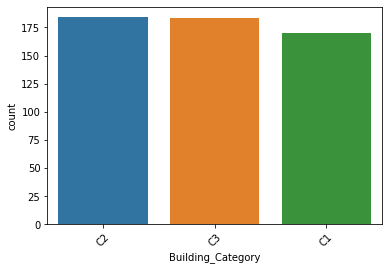

In [15]:
# Plotting the Frequency of each building category
sns.countplot(x='Building_Category', data=energy_eff)
plt.xticks(rotation=45)
plt.show()

In [16]:
'''
    Plotting histogram for column Heating_Load for visualizing the shape of the distribution of a variable, including its central tendency 
    (where the data tends to cluster) and its spread (how spread out the data is)to identify outliers, as well as any skewness
'''
fig = px.histogram(energy_eff, x="Heating_Load")
fig.show()

In [17]:
# Checking mean values of target colummns grouped by their Building_Category
dv1 = energy_eff[['Building_Category', 'Heating_Load']].groupby(['Building_Category']).mean().sort_values('Heating_Load')
dv1 = dv1.reset_index()
dv1.head()
# We observe that there is not much difference between the mean values of target columns as per their building category.

,Building_Category,Heating_Load
0,C3,21.675410
1,C1,22.036706
2,C2,22.287826


In [18]:
# Boxplot of below columns which are in the same range to compare the five number summary of the below columns
fig = px.box(energy_eff, y=['Surface_Area', 'Wall_Area', 'Roof_Area'])
fig.show()

In [19]:
# Boxplot of below columns which are in the same range to compare the five number summary of the below columns
fig = px.box(energy_eff, y=['Overall_Height', 'Orientation', 'Glazing_Area_Distribution'])
fig.show()

In [20]:
'''
  Plotting Violin plot to analyze the distribution of data. The width of the violin at any given point represents the density or frequency of the data at that point. 
  The thicker the violin, the more values there are at that point. The height of the violin represents the range of values distributed.
  Here we observe that Relative_Compactness and Glazing_Area have similar value range.
'''
fig = go.Figure() 
fig.add_trace(go.Violin(y=energy_eff['Relative_Compactness'].values, marker_color = 'blue'))
fig.add_trace(go.Violin(y=energy_eff['Glazing_Area'].values, marker_color = 'yellow'))
fig.show()

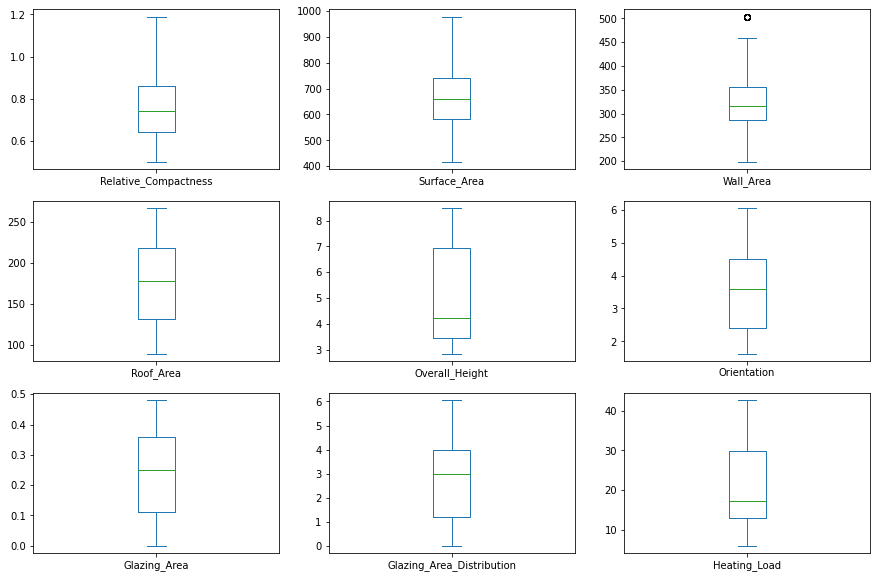

In [21]:
# Box plot of all the columns to compare the five number summary of these columns
energy_eff.plot(kind='box', subplots=True, layout=(3,3), sharex=False,sharey=False,figsize=(15,10))
plt.show()

# Dropping Irrelevant Features By looking for Correlations

We will find the correlations between each input feature and the target feature we are predicting and drop the irrelevant features that are not correlated with the target feature

<Axes: >

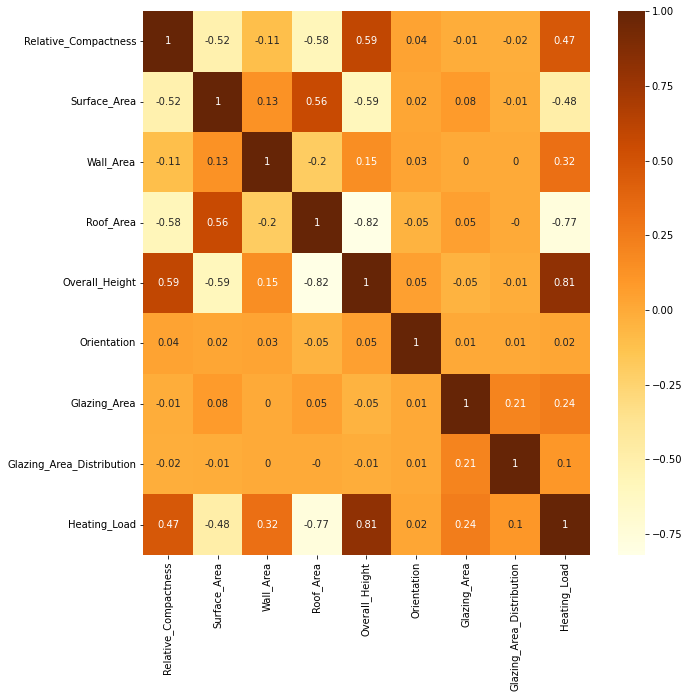

In [22]:
# Getting the correlation matrix and rounding off to 2 decimal places
corr_matrix = energy_eff.corr().round(2)

# Plotting the matrix
plt.figure(figsize = (10,10))

sns.heatmap(corr_matrix, annot = True, cmap = 'YlOrBr')

In [23]:
# Checking the input features that are most positively correlated with the target variable.
corr_matrix[target_feature].sort_values(ascending=False)

Heating_Load                 1.00
Overall_Height               0.81
Relative_Compactness         0.47
Wall_Area                    0.32
Glazing_Area                 0.24
Glazing_Area_Distribution    0.10
Orientation                  0.02
Surface_Area                -0.48
Roof_Area                   -0.77
Name: Heating_Load, dtype: float64

We observe that Overall_Height and Relative_Compactness are most positively correlated with the target variable and almost all of the input features are correlated with the target variable.

In [24]:
# Checking the input features that are highly correlated(Positive or Negative) with the target variable.
abs(corr_matrix[target_feature]).sort_values(ascending=False)

Heating_Load                 1.00
Overall_Height               0.81
Roof_Area                    0.77
Surface_Area                 0.48
Relative_Compactness         0.47
Wall_Area                    0.32
Glazing_Area                 0.24
Glazing_Area_Distribution    0.10
Orientation                  0.02
Name: Heating_Load, dtype: float64

We observe that Overall_Height and Roof_Area are highly correlated with the target variable.

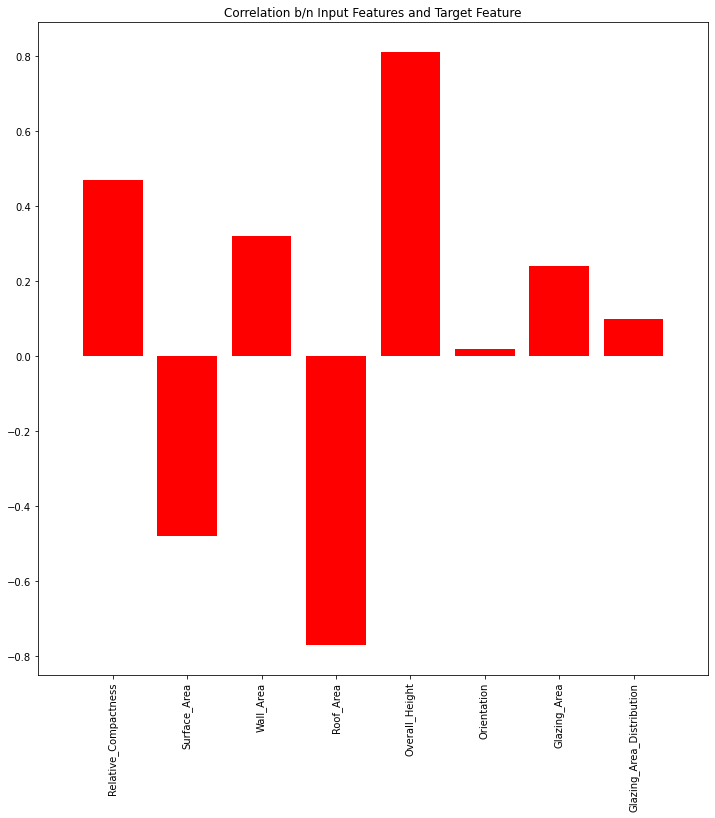

In [25]:
# Plotting the correlation between each input feature and target feature
plt.figure(figsize=(12,12))
plt.title("Correlation b/n Input Features and Target Feature")
plt.bar(range(len(input_features)), corr_matrix[target_feature][input_features], color="r", align="center")
plt.xticks(range(len(input_features)), input_features, rotation='vertical')
plt.xlim([-1, len(input_features)])
plt.show()

# Preparing the Data for ML Algorithms

In [26]:
energy_eff = train_set.drop(target_feature, axis=1)
energy_eff_labels = train_set[target_feature].copy()

# Data Cleaning

In [27]:
# Checking for null values in the dataset.
energy_eff.isna().sum()

Building_Category             0
Relative_Compactness          0
Surface_Area                  0
Wall_Area                    28
Roof_Area                     0
Overall_Height                0
Orientation                   0
Glazing_Area                  0
Glazing_Area_Distribution     0
dtype: int64

We observe that column Wall_Area has 26 null values

In [28]:
''' 
 Replacing the null values with Median. Here we observe that the data is not normally distributed for this column, hence median is preferred for replacing null values
 over mean in the presence of outliers or skewed data because it is less sensitive to extreme values.
 Setting the inplace flag to true so that same dataframe will be modified without creating a new copy of dataframe.

'''
energy_eff['Wall_Area'].fillna(value = energy_eff['Wall_Area'].median(),inplace=True) # Replacing null values with median for Wall Area Column

In [29]:
# Verifying whether the null values are replaced or not
energy_eff.isna().sum()

Building_Category            0
Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
dtype: int64

Preparing a Median based Imputer to populate missing values for future data

In [30]:
# Removing the text attribute column Building_Category since median can be calculated only on numerical values
energy_eff_numerical = energy_eff.drop("Building_Category", axis=1)

In [31]:
# Fitting the imputer
imputer = SimpleImputer(strategy="median")
imputer.fit(energy_eff_numerical)

SimpleImputer(strategy='median')

In [32]:
# Display the medians of columns recorded by the imputer
imputer.statistics_

array([7.4000e-01, 6.6150e+02, 3.1532e+02, 1.7860e+02, 4.2400e+00,
       3.6000e+00, 2.5000e-01, 2.9700e+00])

In [33]:
# Verifying the values of Imputer by comparing with the actual median values
energy_eff_numerical.median().values

array([7.4000e-01, 6.6150e+02, 3.1532e+02, 1.7860e+02, 4.2400e+00,
       3.6000e+00, 2.5000e-01, 2.9700e+00])

Both are same as expected

# Feature Engineering - Experimenting by creating new features to add useful information

Based on the domain knowledge, We observe that 3 more features can be derived from the input features which can be useful. We will derive the below features.

1.   Total Area : Surface Area + Wall Area + Roof Area
2.   Surface Area Ratio : Surface Area / Overall Height
3.   Glazing Area Ratio : Glazing Area / Total Area

Then after deriving these features we will then look for correlations with the target feature to see if they are useful or not.



In [34]:
# Creating new feature Total Area which is the sum of Surface Area, Wall Area, Roof Area
energy_eff['Total_Area'] = energy_eff['Surface_Area'] + energy_eff['Wall_Area'] + energy_eff['Roof_Area']
# Creating new feature Surface Area Ratio which is the ratio of Surface Area and Overall Height
energy_eff['Surface_Area_Ratio'] = energy_eff['Surface_Area']/energy_eff['Overall_Height']
# Creating new feature Glazing Area Ratio which is the ratio of Glazing Area and Total Area
energy_eff['Glazing_Area_Ratio'] = energy_eff['Glazing_Area']/energy_eff['Total_Area']

# Adding newly created features to existing Input features
input_features.extend(['Total_Area', 'Surface_Area_Ratio', 'Glazing_Area_Ratio'])
input_features

['Relative_Compactness',
 'Surface_Area',
 'Wall_Area',
 'Roof_Area',
 'Overall_Height',
 'Orientation',
 'Glazing_Area',
 'Glazing_Area_Distribution',
 'Total_Area',
 'Surface_Area_Ratio',
 'Glazing_Area_Ratio']

In [35]:
# Looking for correlations of the newly added features with the target feature.
temp_df = pd.concat([energy_eff, energy_eff_labels], axis=1)
corr_matrix = temp_df.corr()
abs(corr_matrix[target_feature]).sort_values(ascending=False)

Heating_Load                 1.000000
Overall_Height               0.811893
Surface_Area_Ratio           0.771833
Roof_Area                    0.766757
Surface_Area                 0.475122
Relative_Compactness         0.468361
Total_Area                   0.468207
Glazing_Area_Ratio           0.366652
Wall_Area                    0.308580
Glazing_Area                 0.242791
Glazing_Area_Distribution    0.095042
Orientation                  0.021111
Name: Heating_Load, dtype: float64

We Observe that the newly added features are highly correlated with the target feature. So including these features as part of final features used in the training.

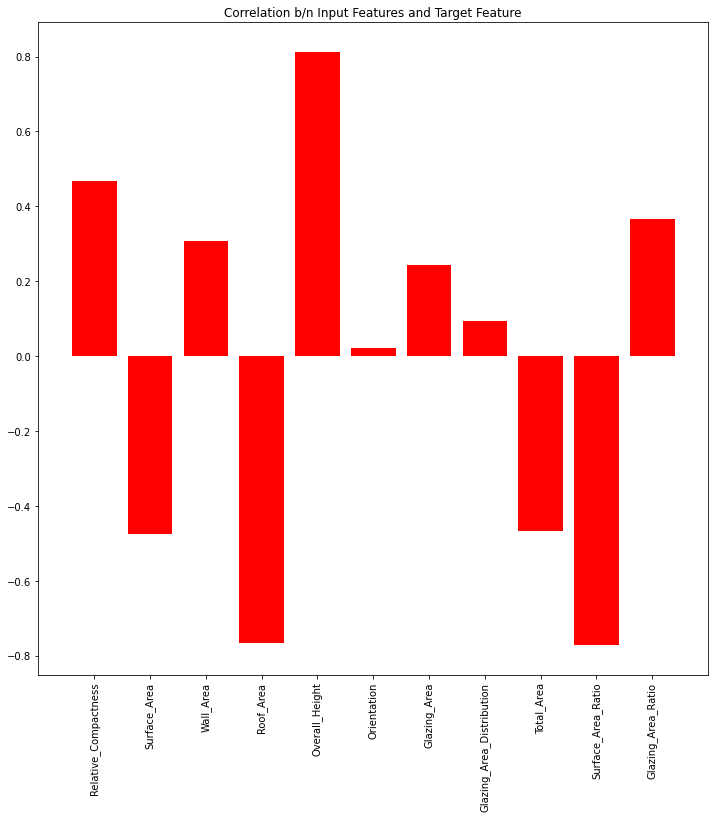

In [36]:
# Plotting the correlation between new input features and target feature
plt.figure(figsize=(12,12))
plt.title("Correlation b/n Input Features and Target Feature")
plt.bar(range(len(input_features)), corr_matrix[target_feature][input_features], color="r", align="center")
plt.xticks(range(len(input_features)), input_features, rotation='vertical')
plt.xlim([-1, len(input_features)])
plt.show()

In [37]:
'''
  Using describe method for getting a quick statistical summary of dataset to check what is the standard deviation from the mean value of newly added columns and
  for getting the minimum and maximum values. 
''' 
energy_eff[['Total_Area', 'Surface_Area_Ratio', 'Glazing_Area_Ratio']].describe()

,Total_Area,Surface_Area_Ratio,Glazing_Area_Ratio
count,537.000000,537.000000,537.000000
mean,1166.189777,152.319009,0.000210
std,167.819089,71.067630,0.000125
min,764.030000,53.889020,0.000000
25%,1031.940000,85.909091,0.000097
50%,1166.940000,159.789610,0.000209
75%,1277.920000,210.000000,0.000303
max,1612.590000,323.591549,0.000531


# Handling Text and Categorical Attributes
Encoding the categorical values to numerical values using One Hot Encoder. Here One Hot Encoder is used instead of Ordinal Encoder since there is no ordinal relationship between the categories in a categorical variable, i.e., the categories cannot be ranked in a meaningful way.

In [38]:
energy_eff_categorical = energy_eff[['Building_Category']]
energy_eff_categorical.head()

,Building_Category
662,C2
469,C3
203,C3
574,C2
408,C3


In [39]:
# OneHotEncoder encodes each category into each column

cat_encoder = OneHotEncoder(sparse=False)
energy_eff_categorical_1hot = cat_encoder.fit_transform(energy_eff_categorical)
energy_eff_categorical_1hot

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [40]:
# Displaying categories
cat_encoder.categories_

[array(['C1', 'C2', 'C3'], dtype=object)]

# Custom Transformers to add the additional 3 new features for new data

We will create a custom transformer capable of deriving the 3 new features we have experimented with, from the input features.

In [41]:
# Getting the column Indices of the columns for which the 3 new features depend upon
column_names = ['Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Glazing_Area']
surface_area_ix, wall_area_ix, roof_area_ix, overall_height_ix, glazing_area_ix = [
    energy_eff.columns.get_loc(c) for c in column_names] # get the column indices

# Printing the column indices
print(surface_area_ix, wall_area_ix, roof_area_ix, overall_height_ix, glazing_area_ix)

2 3 4 5 7


Creating Custom Transformer to calculate the 3 new features

In [42]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
      pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        total_area = X[:, surface_area_ix] + X[:, wall_area_ix] + X[:, roof_area_ix] # Calculating Total Area Column = Surface Area Column + Wall Area Column + Roof Area Column
        surface_area_ratio = X[:, surface_area_ix] / X[:, overall_height_ix] # Calculating Surface Area Ratio Column = Surface Area Column / Overall Height Column
        glazing_area_ratio = X[:, glazing_area_ix] / total_area  # Calculating Glazing Area Ratio Column = Glazing Area Column / Total Area Column 
        return np.c_[X, total_area, surface_area_ratio, glazing_area_ratio]

attr_adder = CombinedAttributesAdder()

# Transformation Pipelines
Building a pipeline for preprocessing the numerical attributes. It will include the following stages:-
1.   Imputer (For populating null values with median)
2.   CombinedAttributesAdder (For adding the 3 new features)

1.   StandardScaler (For Scaling the Dataset)
2.   OneHotEncoder (For Encoding the Dataset)

In [43]:
# Pipeline with stages :- Imputer, CombinedAttributesAdder, StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

In [44]:
# Building the full pipeline to transform the dataset
num_attribs = list(energy_eff_numerical)
cat_attribs = ["Building_Category"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [45]:
# Transformed Independent Variables
energy_eff_transformed = full_pipeline.fit_transform(energy_eff)
energy_eff_transformed

array([[-1.53076911,  0.70218982, -0.08597332, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.27705213,  0.13385857, -0.5750626 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.0761831 , -0.70953335, -0.44967696, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.87965921, -0.9112556 ,  1.10936974, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.21009579, -0.84398714,  0.05186558, ...,  0.        ,
         1.        ,  0.        ],
       [-1.32990009, -0.0494875 , -0.9512195 , ...,  0.        ,
         0.        ,  1.        ]])

In [46]:
# Verifying rows and columns
energy_eff_transformed.shape

(537, 14)

# Model Selection and Training

**Linear Regression - Training and Evaluating on the Training Set**

In [47]:
# Training the model with Linear Regression

lrmodel = LinearRegression()
lrmodel.fit(energy_eff_transformed, energy_eff_labels)

LinearRegression()

In [48]:
# Predicting the values and calculating the root mean squared error

energy_eff_predictions = lrmodel.predict(energy_eff_transformed)
lr_mse = mean_squared_error(energy_eff_labels, energy_eff_predictions)
lr_rmse = np.sqrt(lr_mse)
print('Root Mean Squared Error : ', lr_rmse)

Root Mean Squared Error :  4.401010545195448


In [49]:
# Calculating the R2 Score

lr_r2_score = r2_score(energy_eff_labels, energy_eff_predictions)
print('R2 Score : ', lr_r2_score)

R2 Score :  0.8059466713087386


**Ridge Regression - Training and Evaluating on the Training Set**

In [50]:
# Training the model with Ridge Regression

ridgemodel = Ridge()
ridgemodel.fit(energy_eff_transformed, energy_eff_labels)

Ridge()

In [51]:
# Predicting the values and calculating the root mean squared error

energy_eff_predictions = ridgemodel.predict(energy_eff_transformed)
ri_mse = mean_squared_error(energy_eff_labels, energy_eff_predictions)
ri_rmse = np.sqrt(ri_mse)
print('Root Mean Squared Error : ', ri_rmse)

Root Mean Squared Error :  4.401074345059287


In [52]:
# Calculating the R2 Score

ri_r2_score = r2_score(energy_eff_labels, energy_eff_predictions)
print('R2 Score : ', ri_r2_score)

R2 Score :  0.8059410450256116


**Lasso Regression - Training and Evaluating on the Training Set**

In [53]:
# Training the model with Ridge Regression

lassomodel = Lasso()
lassomodel.fit(energy_eff_transformed, energy_eff_labels)

Lasso()

In [54]:
# Predicting the values and calculating the root mean squared error

energy_eff_predictions = lassomodel.predict(energy_eff_transformed)
la_mse = mean_squared_error(energy_eff_labels, energy_eff_predictions)
la_rmse = np.sqrt(la_mse)
print('Root Mean Squared Error : ', la_rmse)

Root Mean Squared Error :  4.761482393727044


In [55]:
# Calculating the R2 Score

la_r2_score = r2_score(energy_eff_labels, energy_eff_predictions)
print('R2 Score : ', la_r2_score)

R2 Score :  0.7728563270758659


**ElasticNet Regression - Training and Evaluating on the Training Set**

In [56]:
# Training the model with ElasticNet Regression

elasticnetmodel = ElasticNet()
elasticnetmodel.fit(energy_eff_transformed, energy_eff_labels)

ElasticNet()

In [57]:
# Predicting the values and calculating the root mean squared error

energy_eff_predictions = elasticnetmodel.predict(energy_eff_transformed)
en_mse = mean_squared_error(energy_eff_labels, energy_eff_predictions)
en_rmse = np.sqrt(en_mse)
print('Root Mean Squared Error : ', en_rmse)

Root Mean Squared Error :  5.169955725245633


In [58]:
# Calculating the R2 Score

en_r2_score = r2_score(energy_eff_labels, energy_eff_predictions)
print('R2 Score : ', en_r2_score)

R2 Score :  0.7322127309733556


# 2 Best Evaluators using Cross Validation
K-fold cross-validation is a technique used in machine learning to assess the performance of a model on an independent data set. In this technique, the original data set is randomly partitioned into k equal-sized subsets. A model is trained on k-1 subsets and evaluated on the remaining subset. This process is repeated k times, with each subset serving as the testing set exactly once. The performance metric is averaged across all k iterations to produce an overall estimate of model performance. K-fold cross-validation is useful for estimating the performance of a model when there is a limited amount of data available for training. Since the dataset we are currently using is limited K-fold is very useful for estimating the model performance.

In [59]:
# Function to display error scores in a CV, on all test folds, and their average and standard deviation

def display_scores(scores):
    print("Scores:", scores, '\n')
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

**Linear Regression - Cross Validation Error Scores**

In [60]:
lr_scores = cross_val_score(lrmodel, energy_eff_transformed, energy_eff_labels,
                             n_jobs=-1, scoring="neg_mean_squared_error", cv=10)
lr_rmse_scores = np.sqrt(-lr_scores)
display_scores(lr_rmse_scores)

Scores: [4.60787026 4.48591383 4.6628125  4.76793573 4.24331716 4.76928611
 4.70736722 4.66860863 3.8040518  4.53209624] 

Mean: 4.524925948521188
Standard deviation: 0.28268781944100096


**Ridge Regression - Cross Validation Error Scores**

In [61]:
ri_scores = cross_val_score(ridgemodel, energy_eff_transformed, energy_eff_labels,
                             n_jobs=-1, scoring="neg_mean_squared_error", cv=10)
ri_rmse_scores = np.sqrt(-ri_scores)
display_scores(ri_rmse_scores)

Scores: [4.60739213 4.48346524 4.6621338  4.76416268 4.23945302 4.76807126
 4.68303885 4.67366867 3.79077158 4.58287795] 

Mean: 4.525503517043025
Standard deviation: 0.28542181613101636


**Lasso Regression - Cross Validation Error Scores**

In [62]:
la_scores = cross_val_score(lassomodel, energy_eff_transformed, energy_eff_labels,
                             n_jobs=-1, scoring="neg_mean_squared_error", cv=10)
la_rmse_scores = np.sqrt(-la_scores)
display_scores(la_rmse_scores)

Scores: [4.58652155 4.96268924 4.52419926 5.16048065 4.49214793 5.53065685
 4.67294035 5.03426931 4.29649965 4.86302807] 

Mean: 4.812343286599459
Standard deviation: 0.3512368635793136


**ElasticNet Regression - Cross Validation Error Scores**

In [63]:
en_scores = cross_val_score(elasticnetmodel, energy_eff_transformed, energy_eff_labels,
                             n_jobs=-1, scoring="neg_mean_squared_error", cv=10)
en_rmse_scores = np.sqrt(-en_scores)
display_scores(en_rmse_scores)

Scores: [4.78252375 5.7216362  5.36277367 5.20537474 4.85234521 5.77980314
 5.19111457 5.57601399 4.66995043 5.15896611] 

Mean: 5.230050179732979
Standard deviation: 0.3667454290500675


By performing Cross Validation on all the four models we observe that Linear Regression and Ridge Regression has the lowest Root Mean Squared Error.

# Fine Tuning the Model

In [64]:
# Parameters to tune :- alpha, fit_intercept
'''
  In ridge regression, alpha is a hyperparameter that controls the amount of regularization applied to the regression model. Ridge regression is a linear regression 
  technique that adds an L2 regularization term to the loss function. The regularization term penalizes the model for large coefficients and helps to prevent overfitting.
  The alpha hyperparameter controls the strength of the L2 regularization. A higher alpha value will result in a more regularized model, with smaller coefficients and 
  less overfitting. Conversely, a lower alpha value will result in a less regularized model, with larger coefficients and potentially more overfitting.

  In ridge regression, fit_intercept is a parameter that controls whether or not an intercept term is included in the regression model. The intercept term is a constant 
  that represents the predicted value of the dependent variable when all independent variables are set to zero.
'''
# List of alpha to tune
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0],
              'fit_intercept': [True,False]}

# Defining cross validation folds as 5
cvfolds = 5

Grid search involves specifying a range of values for each hyperparameter, and then exhaustively searching all possible combinations of these values. For example, one could specify a range of learning rates from 0.001 to 0.1, and a range of regularization parameters from 0.1 to 1.0. Grid search would then train the model with all combinations of learning rate and regularization parameter in this range, and evaluate each combination using a specified metric such as accuracy or mean squared error. The combination of hyperparameters that results in the best metric score is then chosen as the optimal hyperparameters for the model.

Grid search is a powerful technique for improving model performance, but can be computationally expensive, especially for large datasets and complex models with many hyperparameters. Since the dataset we are using is very small it is not that much time consuming to perform grid search. Hence it is very useful in this case to find the best hyperparameter for our model.

**Grid Search - Tuning Ridge Regression**

Using Grid Search for optimisation to find best parameters.

In [65]:
ridgemodel = Ridge()
grid_search = GridSearchCV(estimator = ridgemodel,
                       param_grid=parameters,
                       cv=cvfolds,
                       scoring='r2',
                       return_train_score=True,
                       verbose=1)

grid_search.fit(energy_eff_transformed, energy_eff_labels)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0],
                         'fit_intercept': [True, False]},
             return_train_score=True, scoring='r2', verbose=1)

In [66]:
print('Best parameter value for ridge regression is', grid_search.best_params_)

Best parameter value for ridge regression is {'alpha': 2.0, 'fit_intercept': True}


In [67]:
# Predicting the values and calculating the root mean squared error with the best estimator

ridgemodel = grid_search.best_estimator_
energy_eff_predictions = ridgemodel.predict(energy_eff_transformed)
ri_mse = mean_squared_error(energy_eff_labels, energy_eff_predictions)
ri_rmse = np.sqrt(ri_mse)
print('Root Mean Squared Error : ', ri_rmse)

Root Mean Squared Error :  4.401228825405313


In [68]:
# Calculating the R2 Score with the best estimator

ri_r2_score = r2_score(energy_eff_labels, energy_eff_predictions)
print('R2 Score : ', ri_r2_score)

R2 Score :  0.8059274216153752


Randomized search is a technique used for hyperparameter tuning in machine learning. In randomized search, rather than exhaustively searching through all possible combinations of hyperparameters, a specified number of random combinations are sampled from the hyperparameter space.

**Randomized Search - Tuning Ridge Regression**

Using Randomized Search for optimisation to find best parameters.

In [69]:
ridgemodel = Ridge()
randomized_search = RandomizedSearchCV(ridgemodel, param_distributions=parameters, n_jobs=-1, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=24)

randomized_search.fit(energy_eff_transformed, energy_eff_labels)

RandomizedSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.05,
                                                  0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                  0.7, 0.8, 0.9, 1.0, 2.0],
                                        'fit_intercept': [True, False]},
                   random_state=24, scoring='neg_mean_squared_error')

In [70]:
print('Best parameter value for ridge regression is', randomized_search.best_params_)

Best parameter value for ridge regression is {'fit_intercept': True, 'alpha': 1.0}


In [71]:
# Predicting the values and calculating the root mean squared error with the best estimator

ridgemodel = randomized_search.best_estimator_
energy_eff_predictions = ridgemodel.predict(energy_eff_transformed)
ri_mse = mean_squared_error(energy_eff_labels, energy_eff_predictions)
ri_rmse = np.sqrt(ri_mse)
print('Root Mean Squared Error : ', ri_rmse)

Root Mean Squared Error :  4.401074345059287


In [72]:
# Calculating the R2 Score

ri_r2_score = r2_score(energy_eff_labels, energy_eff_predictions)
print('R2 Score : ', ri_r2_score)

R2 Score :  0.8059410450256116


# Evaluating the 2 Best Models on the Test Data

In [73]:
X_test = test_set.drop(target_feature, axis=1)
y_test = test_set[target_feature].copy()

X_test_transformed = full_pipeline.transform(X_test)

**Ridge Regression Model**

In [74]:
test_predictions = ridgemodel.predict(X_test_transformed)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)

print('Root Mean Squared Error on Test Data : ', test_rmse)

Root Mean Squared Error on Test Data :  4.625319894682098


In [75]:
# Calculating the R2 Score

test_r2_score = r2_score(energy_eff_labels, energy_eff_predictions)
print('R2 Score on Test Data: ', test_r2_score)

R2 Score on Test Data:  0.8059410450256116


In [76]:
df_predictions = pd.DataFrame({
    "Real": y_test,
    "Predicted": test_predictions
}, index = None)
 
df_predictions

,Real,Predicted
313,12.50,11.874449
99,24.25,28.844393
550,40.71,35.657415
334,15.08,12.304956
211,37.10,25.799615
...,...,...
396,24.70,31.770726
218,10.07,10.423798
281,15.37,13.147181
547,41.67,34.664539


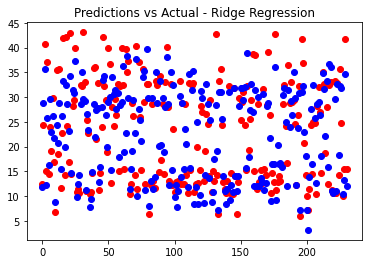

In [77]:
# Plotting the predicted values(Blue) and the actual values(Red)
plt.scatter(range(len(y_test)), y_test, color='red')
plt.scatter(range(len(test_predictions)), test_predictions, color='blue')
plt.title('Predictions vs Actual - Ridge Regression')
plt.show()

**Linear Regression Model**

In [78]:
test_predictions = lrmodel.predict(X_test_transformed)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)

print('Root Mean Squared Error on Test Data : ', test_rmse)

Root Mean Squared Error on Test Data :  4.623821318131385


In [79]:
# Calculating the R2 Score

test_r2_score = r2_score(energy_eff_labels, energy_eff_predictions)
print('R2 Score on Test Data: ', test_r2_score)

R2 Score on Test Data:  0.8059410450256116


In [80]:
df_predictions = pd.DataFrame({
    "Real": y_test,
    "Predicted": test_predictions
}, index = None)
 
df_predictions

,Real,Predicted
313,12.50,11.883634
99,24.25,28.831522
550,40.71,35.713329
334,15.08,12.332740
211,37.10,25.822853
...,...,...
396,24.70,31.792973
218,10.07,10.416825
281,15.37,13.110590
547,41.67,34.677560


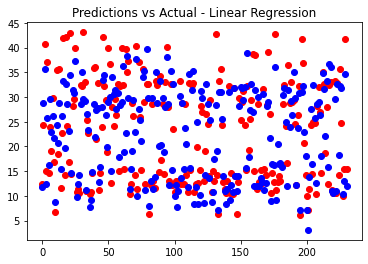

In [81]:
# Plotting the predicted values(Blue) and the actual values(Red)
plt.scatter(range(len(y_test)), y_test, color='red')
plt.scatter(range(len(test_predictions)), test_predictions, color='blue')
plt.title('Predictions vs Actual - Linear Regression')
plt.show()

#Conclusion

In this project, we explored the use of linear regression, ridge regression, lasso regression, and elastic net regression to predict the heating load of a building based on various input features. We started by analyzing the data and performing some exploratory data analysis to understand the distribution and relationships between the features and the target variable and to check for any irrelevant features using correlation matrix. Then 3 New features have been experimented and derived from the input features as per the domain knowledge and then we calculated the correlation with the target column(heating load) and found out that they were useful. We then split the data into training and testing sets and fitted the different regression models on the training data.After evaluating the training data with fine tuned model with optimal parameters we found out that Linear Regression and Ridge Regression were performing well when compared to other models. Finally we evaluated these two best models with the testing data and we got a Root Mean Square Error around 4.62 and a R2 Score around 0.805 for Linear and Ridge Regression models.
Overall, this project demonstrates the effectiveness of linear regression-based models for predicting the heating load of a building.

In [ ]:
!pip3 install nbconvert
!jupyter nbconvert --to html ML_ASSIGNMENT_FINAL.ipynb